MAE: 20008.05
RMSE: 24135.94


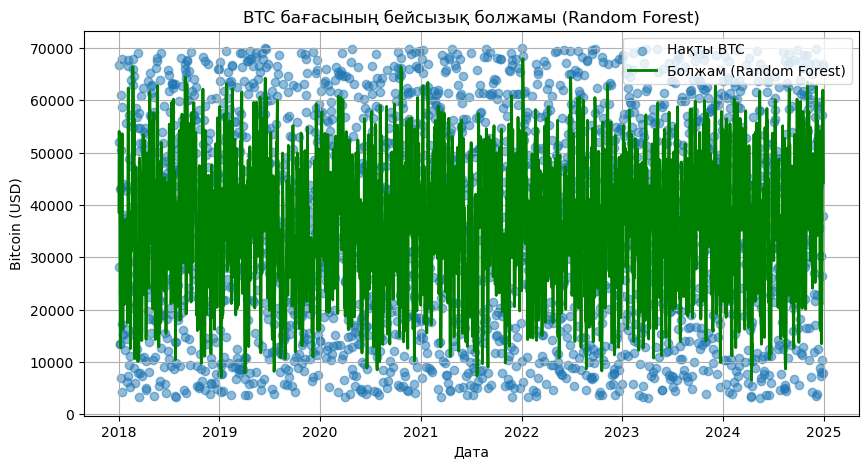

EUR (RUB) мәнін енгізіңіз: 98
RUB (USD) мәнін енгізіңіз: 0.011
Gold мәнін енгізіңіз: 2000

💰 Болжанған Bitcoin бағасы: 40335.30 USD


In [5]:
# Қажетті кітапханаларды жүктеу
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Excel файлын оқу
file_path = r"C:\Users\User\Desktop\data_VNIS_3k.xlsx"
df = pd.read_excel(file_path, parse_dates=["Date"])
df.rename(columns=lambda x: x.strip(), inplace=True)  # Бағандарды тазалау

# Қажетті бағандарды тексеру
required_cols = ["EUR (RUB)", "RUB (USD)", "Gold", "BTC"]
df.dropna(subset=required_cols, inplace=True)

# Кіріс және шығыс айнымалылар
X = df[["EUR (RUB)", "RUB (USD)", "Gold"]]
y = df["BTC"]

# Train/Test бөлу
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Random Forest бейсызық модель
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Болжам және бағалау
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# График
plt.figure(figsize=(10, 5))
plt.scatter(df["Date"], df["BTC"], label="Нақты BTC", alpha=0.5)
plt.plot(df["Date"], model.predict(X), color="green", label="Болжам (Random Forest)", linewidth=2)
plt.xlabel("Дата")
plt.ylabel("Bitcoin (USD)")
plt.title("BTC бағасының бейсызық болжамы (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

# 🔢 Input арқылы BTC болжау
eur_input = float(input("EUR (RUB) мәнін енгізіңіз: "))
rub_input = float(input("RUB (USD) мәнін енгізіңіз: "))
gold_input = float(input("Gold мәнін енгізіңіз: "))

input_df = pd.DataFrame([[eur_input, rub_input, gold_input]], columns=["EUR (RUB)", "RUB (USD)", "Gold"])
btc_pred = model.predict(input_df)[0]

print(f"\n💰 Болжанған Bitcoin бағасы: {btc_pred:.2f} USD")


MAE: 7118.51
RMSE: 8666.53


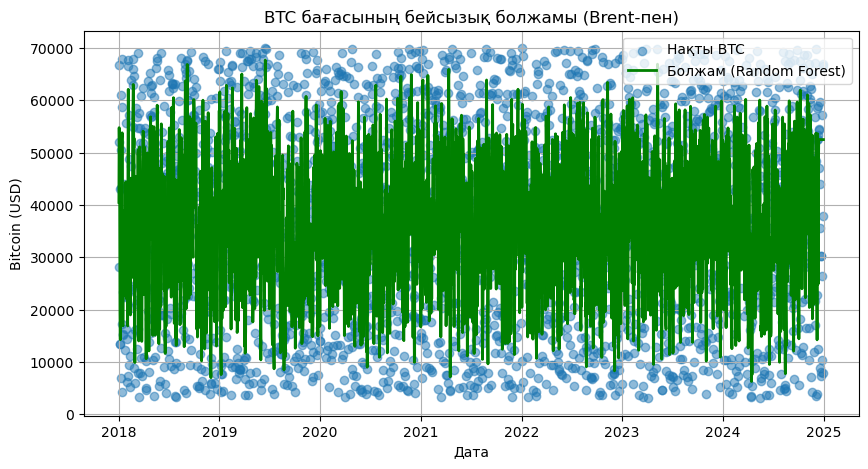


📅 2024-12-15 үшін болжау:
💰 Болжанған Bitcoin бағасы: 52523.71 USD


In [2]:
# Қажетті кітапханаларды жүктеу
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Excel файлын оқу
file_path = r"C:\Users\User\Desktop\data_VNIS_3k.xlsx"
df = pd.read_excel(file_path, parse_dates=["Date"])
df.rename(columns=lambda x: x.strip(), inplace=True)  # Бағандарды тазалау

# Қажетті бағандарды тексеру
required_cols = ["EUR (RUB)", "RUB (USD)", "Gold", "Brent", "BTC"]
df.dropna(subset=required_cols, inplace=True)

# 📅 Күндер бойынша бөліп алу
train_df = df[df["Date"] <= "2024-12-14"]
predict_df = df[df["Date"] == "2024-12-15"]  # Болжау күні

# Кіріс және шығыс айнымалылар
X_train = train_df[["EUR (RUB)", "RUB (USD)", "Gold", "Brent"]]
y_train = train_df["BTC"]

# 🌲 Random Forest бейсызық модель
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Train/Test бағалау
X_test, y_test = X_train, y_train
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# 📈 График
plt.figure(figsize=(10, 5))
plt.scatter(df["Date"], df["BTC"], label="Нақты BTC", alpha=0.5)
plt.plot(df["Date"], model.predict(df[["EUR (RUB)", "RUB (USD)", "Gold", "Brent"]]), color="green",
         label="Болжам (Random Forest)", linewidth=2)
plt.xlabel("Дата")
plt.ylabel("Bitcoin (USD)")
plt.title("BTC бағасының бейсызық болжамы (Brent-пен)")
plt.legend()
plt.grid(True)
plt.show()

# 🔮 15.12.2024 үшін нақты болжам
if not predict_df.empty:
    X_predict = predict_df[["EUR (RUB)", "RUB (USD)", "Gold", "Brent"]]
    btc_pred = model.predict(X_predict)[0]
    print(f"\n📅 2024-12-15 үшін болжау:")
    print(f"💰 Болжанған Bitcoin бағасы: {btc_pred:.2f} USD")
else:
    print("\n⚠️ 2024-12-15 күні Excel файлыңызда жоқ.")
    print("Қолмен мәндерді енгізіңіз:")
    eur_input = float(input("EUR (RUB) мәнін енгізіңіз: "))
    rub_input = float(input("RUB (USD) мәнін енгізіңіз: "))
    gold_input = float(input("Gold мәнін енгізіңіз: "))
    brent_input = float(input("Brent мәнін енгізіңіз: "))
    input_df = pd.DataFrame([[eur_input, rub_input, gold_input, brent_input]], 
                            columns=["EUR (RUB)", "RUB (USD)", "Gold", "Brent"])
    btc_pred = model.predict(input_df)[0]
    print(f"\n💰 Болжанған Bitcoin бағасы: {btc_pred:.2f} USD")
